In [413]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils ,layers,models

In [414]:
labels = []
images = []
path='notMNIST_small'

# Reading Images and storing each pixel in Images Matrix
# Storing the corresponding labels in Labels Array
for label in os.listdir(path):
    label_path = os.path.join(path, label)
    
    if os.path.isdir(label_path):
        label_idx = ord(label) - ord('A')
        print(label_idx)
        for image_file_path in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file_path)
            
            try:
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label_idx)
            except Exception as e:
                print(f"Error reading {image_path}: {e}")

0
Error reading notMNIST_small\A\.ipynb_checkpoints: [Errno 13] Permission denied: 'notMNIST_small\\A\\.ipynb_checkpoints'
1
2
3
4
5
Error reading notMNIST_small\F\.ipynb_checkpoints: [Errno 13] Permission denied: 'notMNIST_small\\F\\.ipynb_checkpoints'
6
7
8
9


In [415]:
print("Total no of Images =",len(labels))
#print(images.shape)
print("No of Class_Label=",label_idx+1)
images=np.array(images)/255.0
labels=utils.to_categorical(np.array(labels),num_classes=10)
print(labels)

Total no of Images = 18723
No of Class_Label= 10
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [416]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

(28, 28)

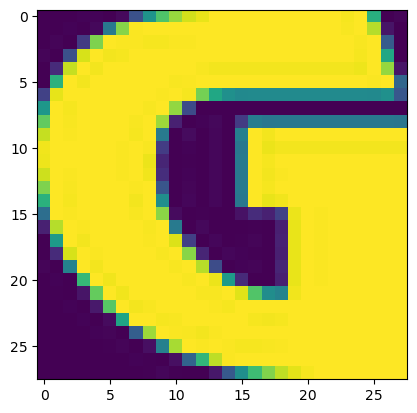

In [417]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[1])
X_train[1].shape

In [418]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print(model.summary())

model.fit(X_train,y_train,epochs=1000,validation_split=0.1)
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accurracy ", test_acc)

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_55 (Flatten)        (None, 784)               0         
                                                                 
 dense_204 (Dense)           (None, 512)               401920    
                                                                 
 dense_205 (Dense)           (None, 256)               131328    
                                                                 
 dense_206 (Dense)           (None, 128)               32896     
                                                                 
 dense_207 (Dense)           (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1000

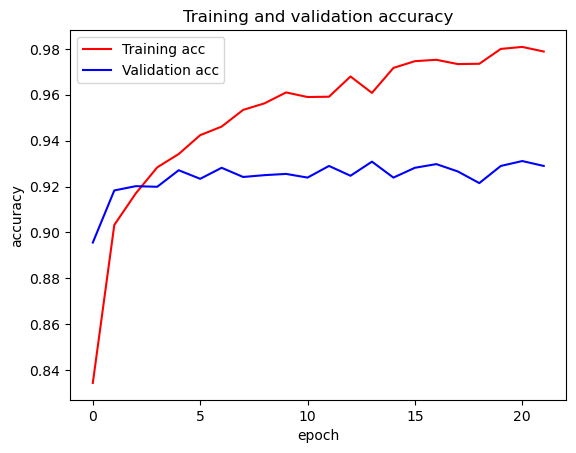

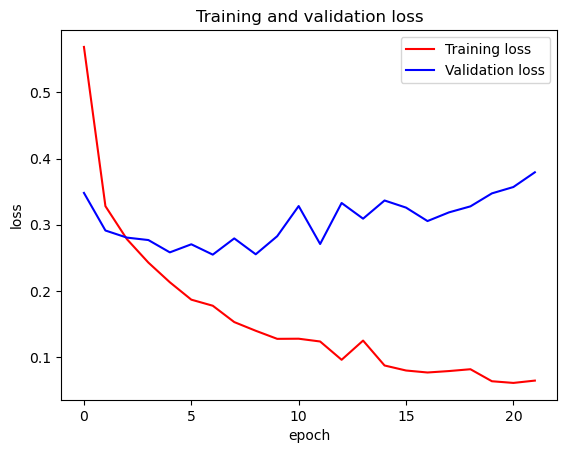

In [436]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
from keras import losses 
from keras import optimizers 
from keras import metrics 
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop ,Adam,SGD,Adagrad,Adadelta,Adamax


In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="softmax"))
#model.add(Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = Adam(learning_rate = 0.001), 
   metrics = ['accuracy'])

In [424]:
history = model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 1000, 
   verbose = 1, 
   validation_data = (X_test, y_test)
)

118/118 [==============================] - 1s 10ms/step - loss: 0.9224 - accuracy: 0.7307 - val_loss: 0.9284 - val_accuracy: 0.7170
Epoch 14/1000
118/118 [==============================] - 1s 9ms/step - loss: 0.8935 - accuracy: 0.7302 - val_loss: 0.8866 - val_accuracy: 0.7207
Epoch 15/1000
118/118 [==============================] - 1s 9ms/step - loss: 0.8516 - accuracy: 0.7348 - val_loss: 0.8353 - val_accuracy: 0.7276
Epoch 16/1000
118/118 [==============================] - 1s 10ms/step - loss: 0.8025 - accuracy: 0.7411 - val_loss: 0.8075 - val_accuracy: 0.7263
Epoch 17/1000
118/118 [==============================] - 1s 10ms/step - loss: 0.7729 - accuracy: 0.7431 - val_loss: 0.7938 - val_accuracy: 0.7250
Epoch 18/1000
118/118 [==============================] - 1s 9ms/step - loss: 0.7549 - accuracy: 0.7422 - val_loss: 0.7594 - val_accuracy: 0.7284
Epoch 19/1000
118/118 [==============================] - 1s 9ms/step - loss: 0.7167 - accuracy: 0.7488 - val_loss: 0.7658 - val_accuracy: 0.7

In [425]:
# Validation accuracy
(eval_loss, eval_accuracy) = model.evaluate(X_test,y_test, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

118/118 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.9303
[INFO] accuracy: 93.03%
[INFO] Loss: 0.42361846566200256


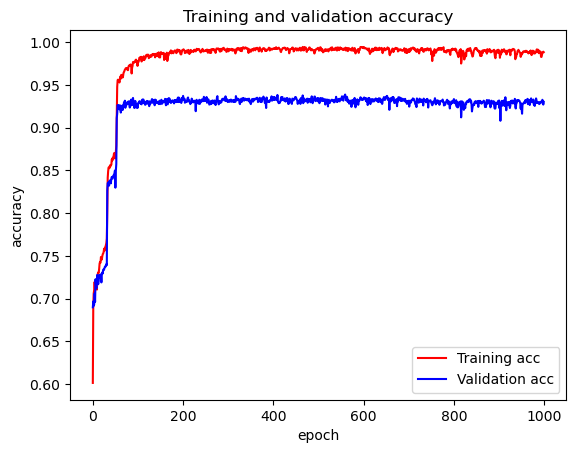

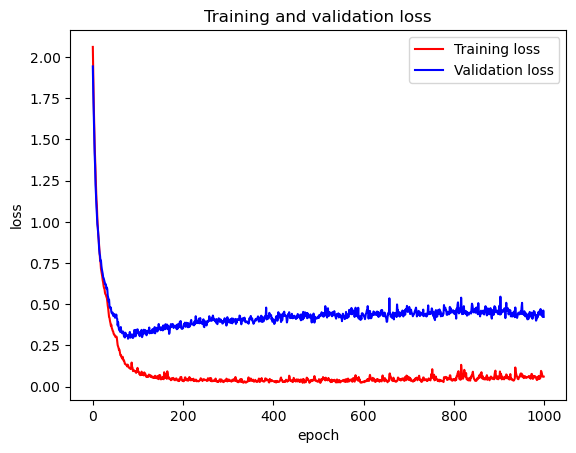

In [426]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [427]:
from keras import losses 
from keras import optimizers 
from keras import metrics 
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop ,Adam,SGD,Adagrad,Adadelta,Adamax

In [428]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
#model.add(Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))
#model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [429]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = Adam(learning_rate = 0.001), 
   metrics = ['accuracy'])

In [430]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_name = "Soumen.h5"
# Checkpoint Callback
checkpoint = ModelCheckpoint(
    model_name, monitor='val_loss', verbose=2, save_best_only=True, mode='auto')

# EarlyStopping Callback
early = EarlyStopping(monitor='val_loss', min_delta=0,
                      patience=15, verbose=1, mode='auto')

In [431]:
history = model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 1000, 
   verbose = 1, 
   validation_data = (X_test, y_test),
   callbacks=[checkpoint, early],
    
)

Epoch 1/1000
111/118 [===========================>..] - ETA: 0s - loss: 0.5786 - accuracy: 0.8317
Epoch 1: val_loss improved from inf to 0.34806, saving model to Soumen.h5
118/118 [==============================] - 3s 13ms/step - loss: 0.5685 - accuracy: 0.8344 - val_loss: 0.3481 - val_accuracy: 0.8956
Epoch 2/1000
113/118 [===========================>..] - ETA: 0s - loss: 0.3282 - accuracy: 0.9034
Epoch 2: val_loss improved from 0.34806 to 0.29128, saving model to Soumen.h5
118/118 [==============================] - 1s 10ms/step - loss: 0.3280 - accuracy: 0.9033 - val_loss: 0.2913 - val_accuracy: 0.9183
Epoch 3/1000
116/118 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.9172
Epoch 3: val_loss improved from 0.29128 to 0.28054, saving model to Soumen.h5
118/118 [==============================] - 1s 11ms/step - loss: 0.2782 - accuracy: 0.9170 - val_loss: 0.2805 - val_accuracy: 0.9202
Epoch 4/1000
112/118 [===========================>..] - ETA: 0s - loss: 0.2426 -

In [432]:
modelLoaded = tf.keras.models.load_model(model_name)

In [433]:
model = modelLoaded

In [434]:
# Validation accuracy
(eval_loss, eval_accuracy) = model.evaluate(X_test,y_test, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

118/118 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9282
[INFO] accuracy: 92.82%
[INFO] Loss: 0.25482434034347534


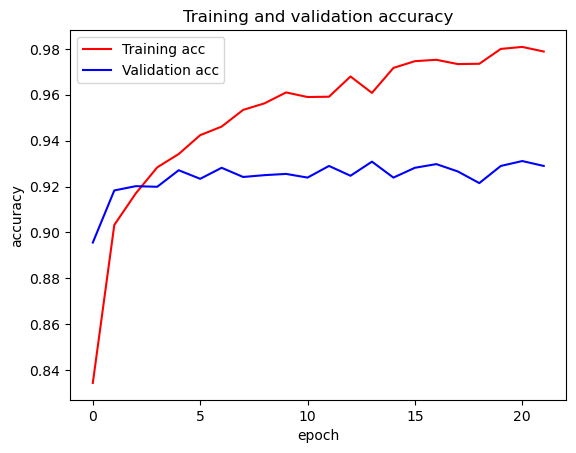

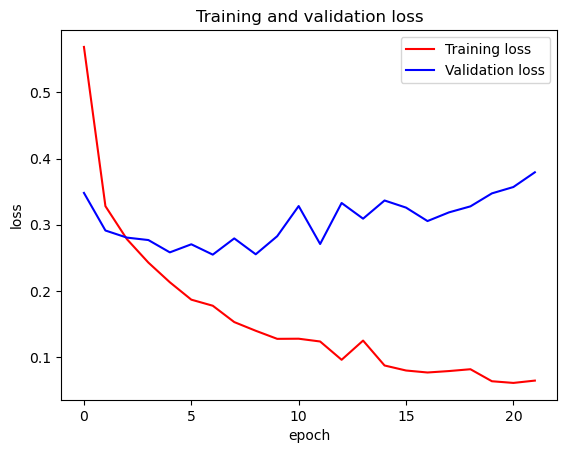

In [435]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
